# Proyecto_DS
# Analisis de precios de inmuebles en la zona Oeste de los EEUU


## Integrantes 

- Tomas Alonso

## 1- Objetivo General

¿Como podemos predecir el precio de la vivienda en la costa oeste de los EEUU?

**Contexto Comercial:**
Somos una empresa a la consultoría de bienes inmobiliarios que fue contratada por otra empresa para realizar un proyecto crediticio sobre la costa Oeste de los EEUU que necesita analizar predecir los precios de los inmuebles a partir de un dataset suministrado por la empresa interesada

.

**Problema comercial:** 
¿Que es lo que determina el precio de una inmueble?¿Sus atributos propios o la cosmovision del cliente al momento de comprar el inmubele tales como lugar o codigo postal del inmueble?

.

**Contexto analitico:**
La empresa crediticia ah proporcionado mas de 4600 datos sobre inmuebles con todos sus atributos mas el precio y la locacion del inmueble
"House Price Prediction"


**link:** https://www.kaggle.com/datasets/shree1992/housedata

## 2- Objetivos especificos

Analizar las variables independientemente a traves de graficos para determinar de forma visual la relevacia que posee cada variable con respecto al precio.

Analizar las variables independientemente o en su conjunto averiguando cual es el mejor modelo para predecir el precio de las viviendas


## 3- Hipotesis

- La hipotesis nula es que los precios son afectados por "la parte material de los atributos del inmueble", es decir tamaño de la vivienda, cantidad de habitaciones,etc.
- La hipotesis alternativa, el precio es guiado unicamente por el deseo del consumidor y no por la cantidad de atributos





## 4- Importamos las librerías necesarias y cargamos el dataset

In [1]:
# Como primer paso importamos las librerias
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from   scipy import stats
import statsmodels.formula.api as sm # es mejor que pinguin
import os

In [2]:
# Importamos drive de google colab y posteriormente lo montamos
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
house = pd.read_csv('/content/drive/MyDrive/Cursos coder/Proyecto_DS_Alonso/Re-entrega/House_price_prediction.csv')

In [4]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 5- Analisis General

In [5]:
house.shape

(4600, 18)

In [6]:
#Devuelve la cantidad permitidad de columnas para visualizar
pd.get_option("display.max_columns")
#Cambia la cantidad perimitida de columnas para visualizar
pd.set_option('display.max_columns', 100)
#Cambia la cantidad perimitida de filas para visualizar
pd.set_option('display.max_rows', 100)

In [7]:
#Vistazo general de info del dataframe
house.head(2)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [8]:
#Vistazo general de medidas descriptivas de variables cuantitativas
house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [9]:
house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [10]:
house.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


## 6- Limpieza de datos

In [11]:
# Se analiza la cantidad de np.nan por columna y su incidencia
# Vemos que hay datos nulos en las columnas "postal date" y "subregion"
house.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street           False
city             False
statezip         False
country          False
dtype: bool

In [12]:
#Usamos otra herramienta para chequearlo nuevamente
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<AxesSubplot:>

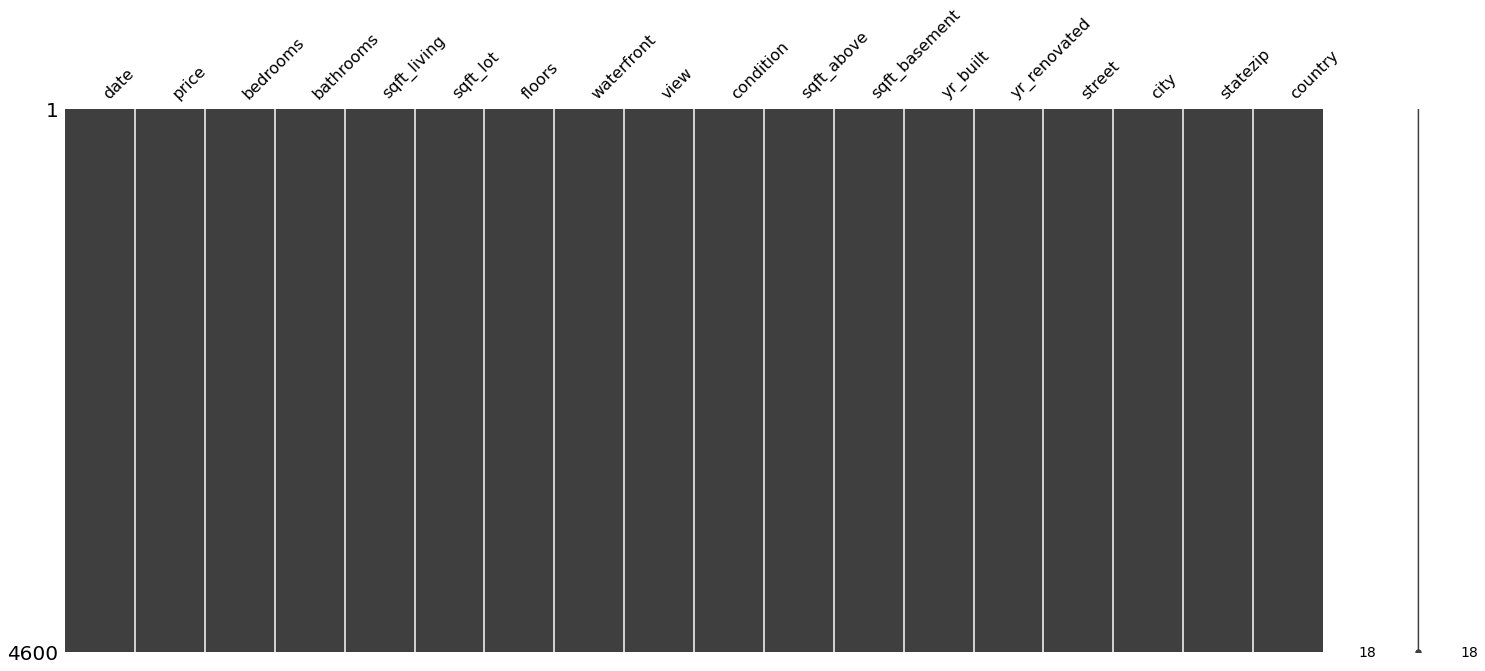

In [13]:
# Analizamos la tabla que generamos con la herramiento y visualizamos que tampoco aparece datos nulos
import missingno as msno
%matplotlib inline
msno.matrix(house)

In [14]:
# Ahora buscamos los datos que son igual a 0 
nun_missing = (house == 0).sum()
print(nun_missing)

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64


In [15]:
pd.set_option('display.max_rows', 10)

In [16]:
house[house['price'] == 0].head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA


In [17]:
house.shape

(4600, 18)

In [18]:
# Como no puede haber una casa que valga 0$ 
# y por otro lado la cantidad de filas con el precio en 0 son pocas (49)
#sobreescribimos y creamos un nuevo df 
house = house[house['price'] != 0]

In [19]:
house[house['price'] == 0].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [20]:
house.shape

(4551, 18)

_________________________

In [21]:
house['price'] = house['price'].astype(int)

In [22]:
pd.set_option('display.max_rows', 100)

In [23]:
house.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [24]:
house.dtypes

date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

## 7- EDA



In [25]:
house.head(1)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


### A- Hacemos una limpieza y realizamos el analisis de las diferentes variables
Estas variables numericas son mas atributos materiales de las vivienda


In [26]:
# Para no afectar el DF original hacemos una copia
house2 = house.copy()

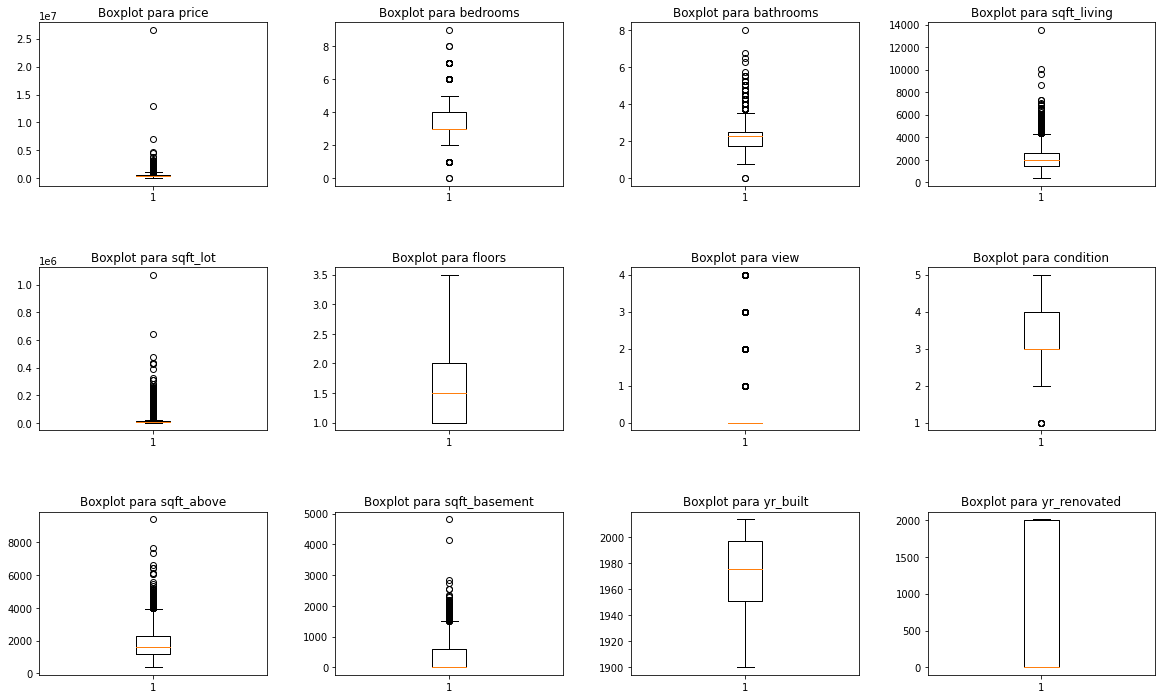

In [27]:
# Realizamos el analisis de los diferentes outliers
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
i = 0
j = 0
for columna in house2.columns:
    if columna not in ['date', 'city', 'street', 'country','waterfront', 'statezip']:
        axs[i, j].boxplot(house2[columna])
        axs[i, j].set_title(f'Boxplot para {columna}')

        j += 1
        if j == 4:
            i += 1
            j = 0
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [28]:
# Revisamos los quantiles de 75% y 25% de cada variable
house2.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.885959,563929.874935,7800.0,326264.00,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.00,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.75,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.00,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.00,7680.00,10978.0,1074218.0
floors,4551.0,1.512195,0.538531,1.0,1.00,1.50,2.0,3.5
waterfront,4551.0,0.006592,0.080932,0.0,0.00,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.00,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.00,3.00,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.00,1590.00,2300.0,9410.0


In [29]:
# Realizamos la limpieza de todos los outliers de las variables donde es necesario

for columna in house2.columns:
    if columna in [ 'price', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement']:
      

      quantile75 = house2[columna].quantile(0.75)
      quantile25 = house2[columna].quantile(0.25)

      house2 = house2[house2[columna] <= quantile75]
      house2 = house2[house2[columna] >= quantile25]


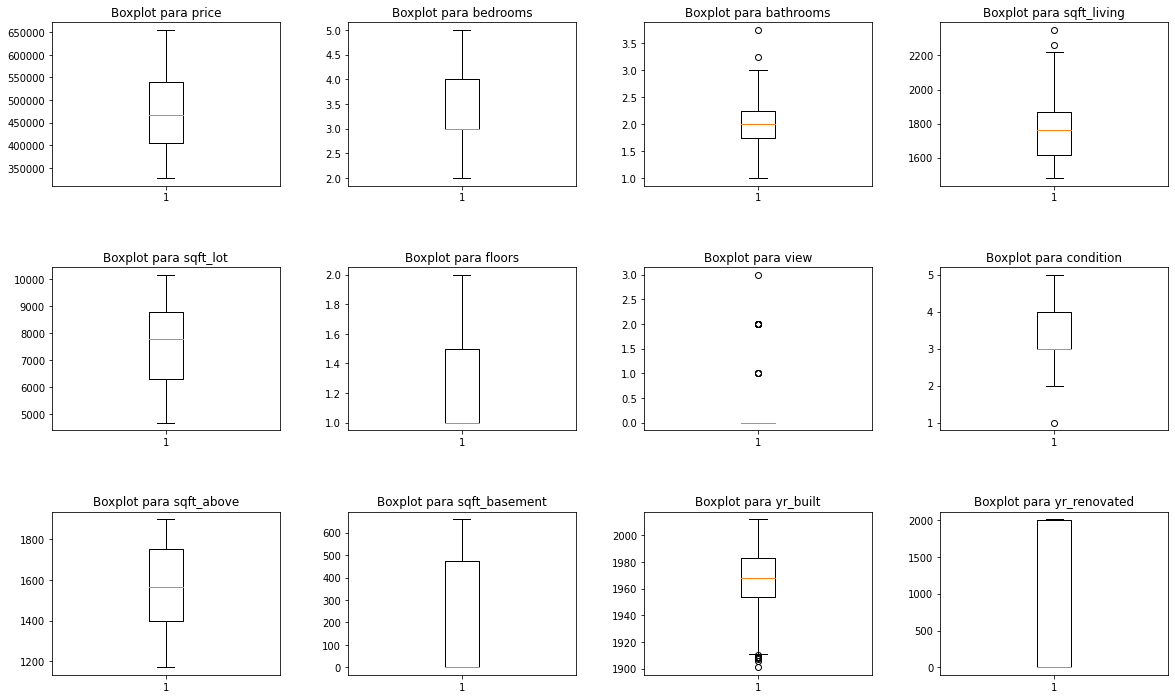

In [30]:
# revisamos y vemos que en general todo esta correcto
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
i = 0
j = 0
for columna in house2.columns:
    if columna not in ['date', 'city', 'street', 'country','waterfront', 'statezip']:
        axs[i, j].boxplot(house2[columna])
        axs[i, j].set_title(f'Boxplot para {columna}')

        j += 1
        if j == 4:
            i += 1
            j = 0
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

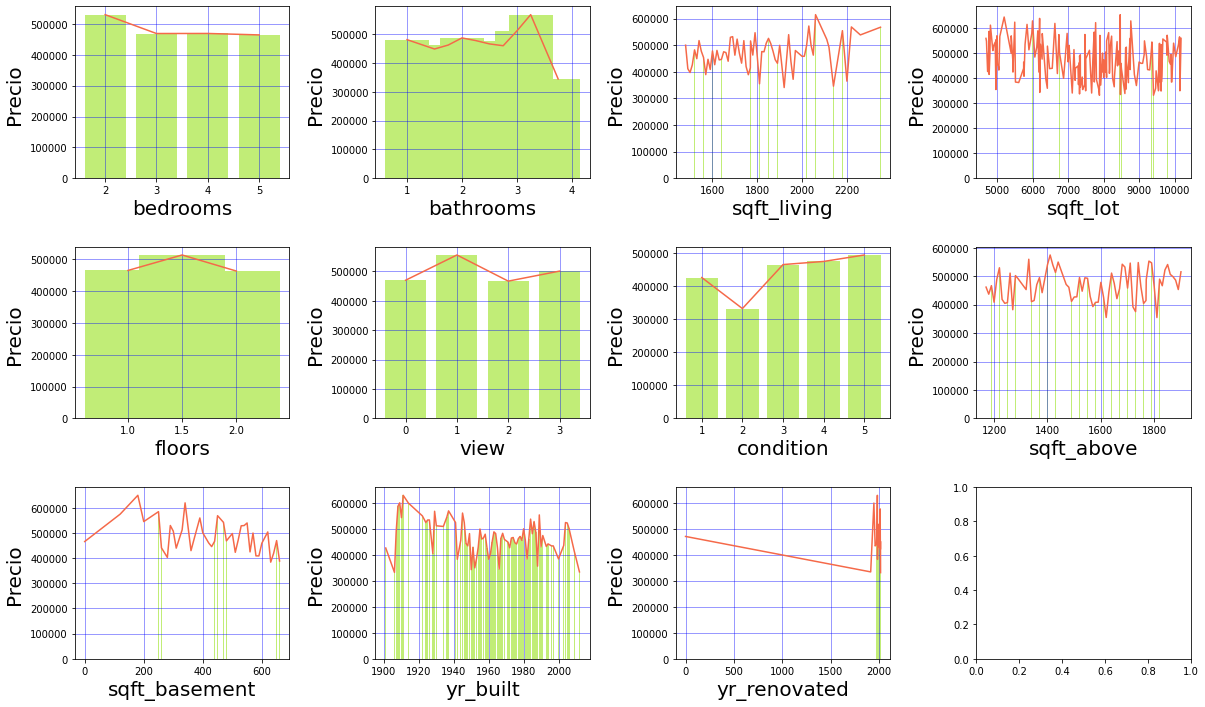

In [31]:
# realizamos los cuadros para poder revisar la relacion que lleva el precio con cada variable del DF
# Podemos observar que en general el precio con el resto de las variables poseen muy poca o absoluta relacion
# por ende ninguna de las varibles que vemos parece predecir el precio de la vivienda
fig, axs = plt.subplots(3, 4, figsize=(20, 12))

i = 0
j = 0
for columna in house.columns:
    if columna not in ['price', 'date', 'city', 'street', 'country','waterfront', 'statezip']:
      
        groupby = house2.groupby([columna])['price'].mean().round(0)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        
        axs[i, j].bar(groupby.index, groupby.values, color = '#C1ED77')
        axs[i, j].plot(groupby.index, groupby.values, color = '#F56949')
    
        # axs[i, j].set_title(f'Precio segun {columna}')
        axs[i, j].set_xlabel(columna, fontsize=20)
        axs[i, j].set_ylabel('Precio ', fontsize=20)
        axs[i, j].grid(color = 'blue', alpha = 0.5)

        j += 1
        if j == 4:
            i += 1
            j = 0


In [32]:
# Vemos que la variable de "yr_renovated" posee datos erroneos por lo que realizamos una limpieza de los outliers
house2 = house2[house2['yr_renovated'] >= 1900]

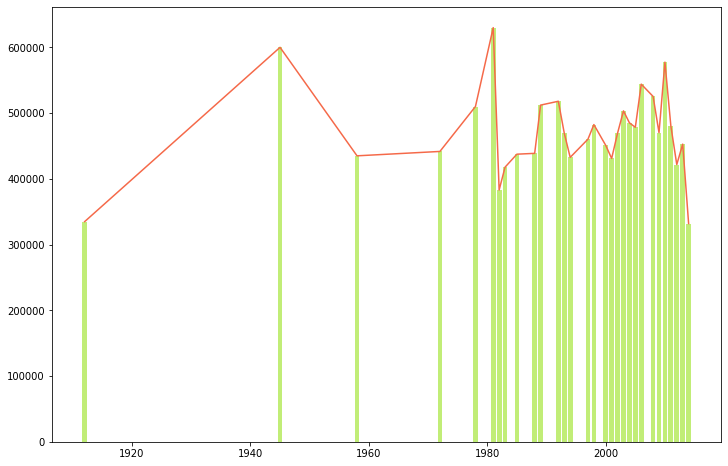

In [33]:
# realizamos de nuevo el grafico y vemos que tampoco precio y yr_renovated poseen una relacion muy fuerte
groupby = house2.groupby(['yr_renovated'])['price'].mean().round(0)
fig, ax = plt.subplots( figsize=(12,8))
ax.bar(groupby.index, groupby.values, color = '#C1ED77')
ax.plot(groupby.index, groupby.values, color = '#F56949')

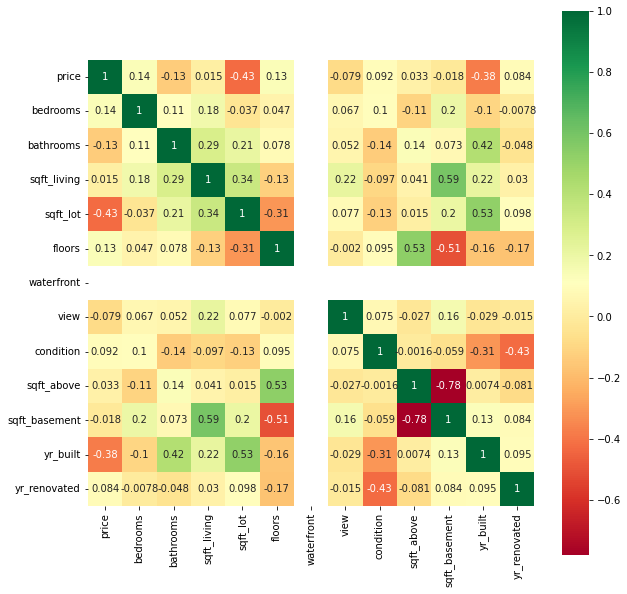

In [34]:
# realizamos un heatmap para observarlo de otra manera
# mismo patron, poca relacion precio-resto de variables
plt.figure(figsize=(10,10)) 
p=sns.heatmap(house2.corr(), annot=True,cmap='RdYlGn',square=True)

In [39]:
house2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

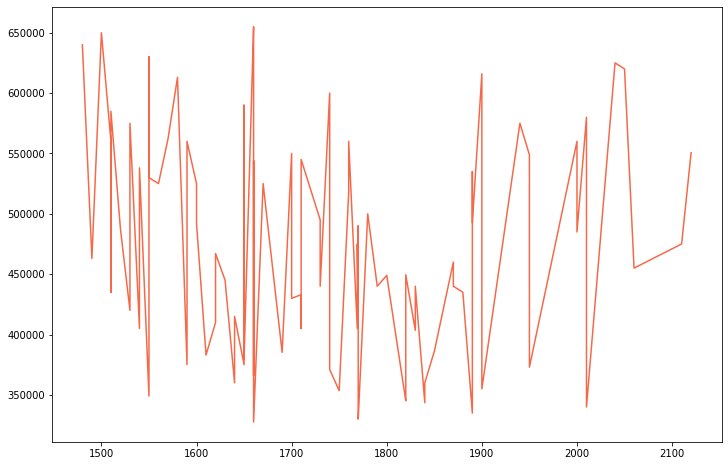

In [43]:
fig, ax = plt.subplots( figsize=(12,8))
#ax.bar(house2['price'], house2['sqft_living'], color = '#C1ED77')
ax.plot( house2['sqft_living'].sort_values(),house2['price'], color = '#F56949')

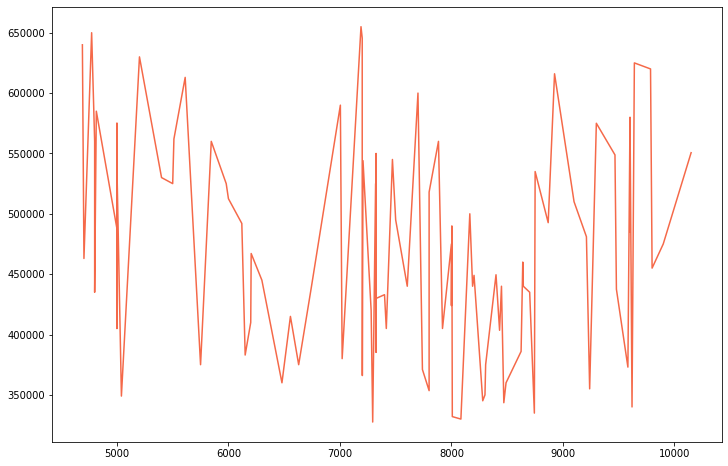

In [44]:
fig, ax = plt.subplots( figsize=(12,8))
#ax.bar(house2['price'], house2['sqft_living'], color = '#C1ED77')
ax.plot( house2['sqft_lot'].sort_values(),house2['price'], color = '#F56949')

### Observemos el resto de variables 
Estas son mas al juicio del consumidos o comprador de la vivienda

In [ ]:
house2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
graf4 = house2.groupby('city')[['price']].mean().sort_values(by='price', ascending=True).round(1)
# graf4['price'] = graf4['price'].round(1)
graf4

,price
city,
Burien,332000.0
Auburn,334888.0
Renton,359992.9
Des Moines,386000.0
Shoreline,387294.4
Bothell,408675.0
Lake Forest Park,434000.0
Kirkland,458379.2
Normandy Park,467500.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

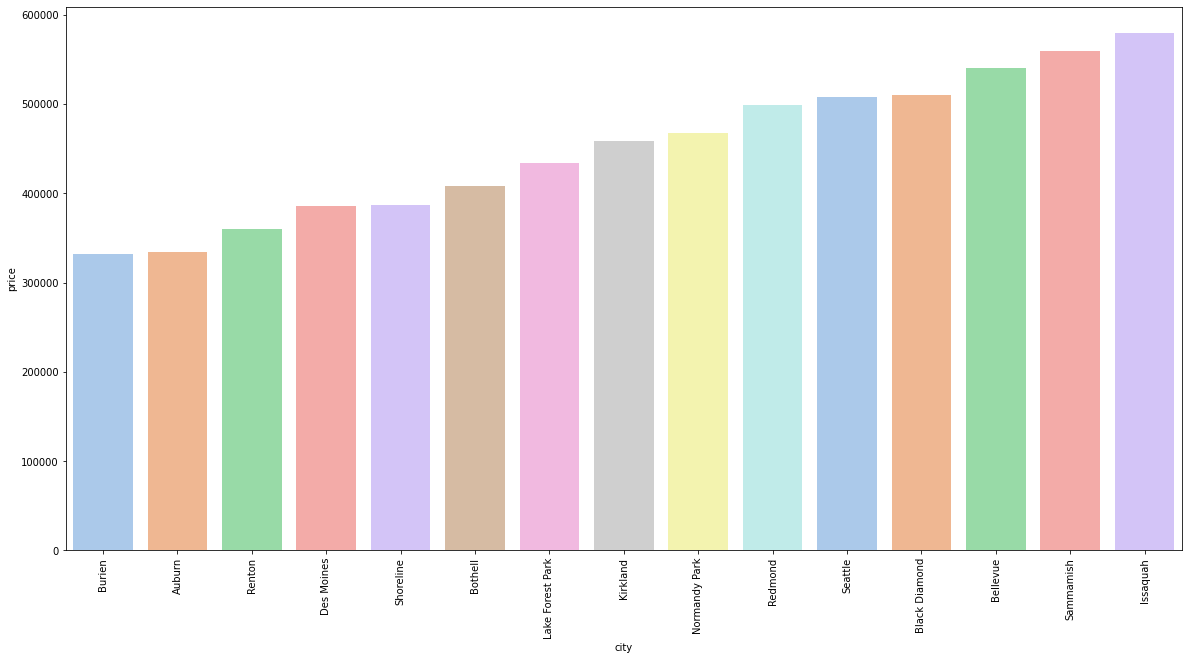

In [ ]:
# aca vemos si una relacion que existe entre precio y lugar de donde se encuentra la vivienda
plt.figure(figsize=(20,10)) 
sns.barplot(x=graf4.index, y="price", data=graf4, palette="pastel")
plt.xticks(rotation=90)


In [ ]:
graf5 = house2.groupby('statezip')[['price']].mean().sort_values(by='price', ascending=True).round(1)
graf5

,price
statezip,
WA 98092,334888.0
WA 98058,340500.0
WA 98178,344300.0
WA 98059,349000.0
WA 98055,352475.0
WA 98136,380000.0
WA 98198,386000.0
WA 98133,386625.0
WA 98056,392500.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

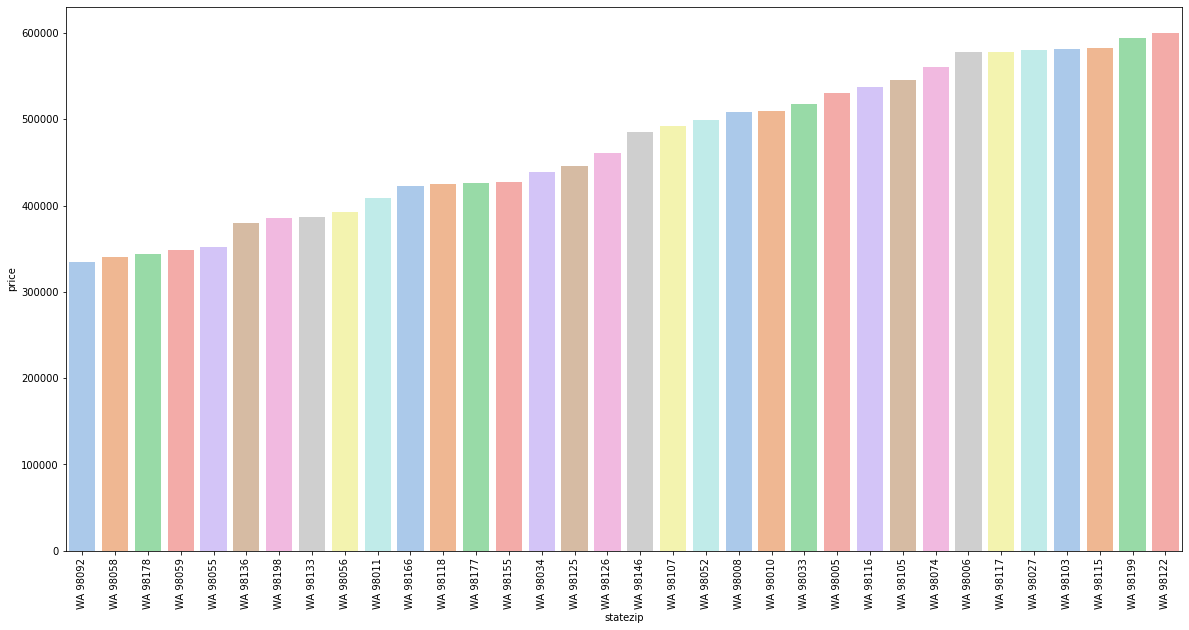

In [ ]:
# mismo patron, encontramos que si hay una relacion apreciable entre precio y codigo postal
plt.figure(figsize=(20,10)) 
sns.barplot(x=graf5.index, y="price", data=graf5, palette="pastel")
plt.xticks(rotation=90)


###  Librería Statsmodels 'Modelo Lineal Simple'

In [ ]:
# Vemos que con solo estas dos variables podemos predecir el 78%
model1 = 'price~city + statezip'
lm1   = sm.ols(formula = model1, data = house2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     5.744
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.86e-09
Time:                        15:21:40   Log-Likelihood:                -1133.4
No. Observations:                  94   AIC:                             2341.
Df Residuals:                      57   BIC:                             2435.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
house2.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
# Ahora realizamos con el mismo modelo y vemos que solamente logramos predecir solo el 28% 
model1 = 'price~bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + sqft_above + sqft_basement + yr_built + yr_renovated'
lm1   = sm.ols(formula = model1, data = house2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     3.347
Date:                Wed, 22 Feb 2023   Prob (F-statistic):            0.00107
Time:                        15:21:42   Log-Likelihood:                -1189.5
No. Observations:                  94   AIC:                             2401.
Df Residuals:                      83   BIC:                             2429.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.302e+05   1.63e+06     -0.080

### Primeras impresiones

Lo que se puede observar es que lo que determina el precio de las viviendas estan dadas mayormente por la cuidad en donde se encuentra y el codigo postal por lo que se cumple la HIPOTESIS ALTERNATIVA donde los precios estan guidos por las preferencias del comprador y no por los atributos

### B- PERO... voy a revisar los datos sin eliminar los outliers

Vamos a utilizar el dataset house que no fue modificado para ver denuevo los datos

In [ ]:
house.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


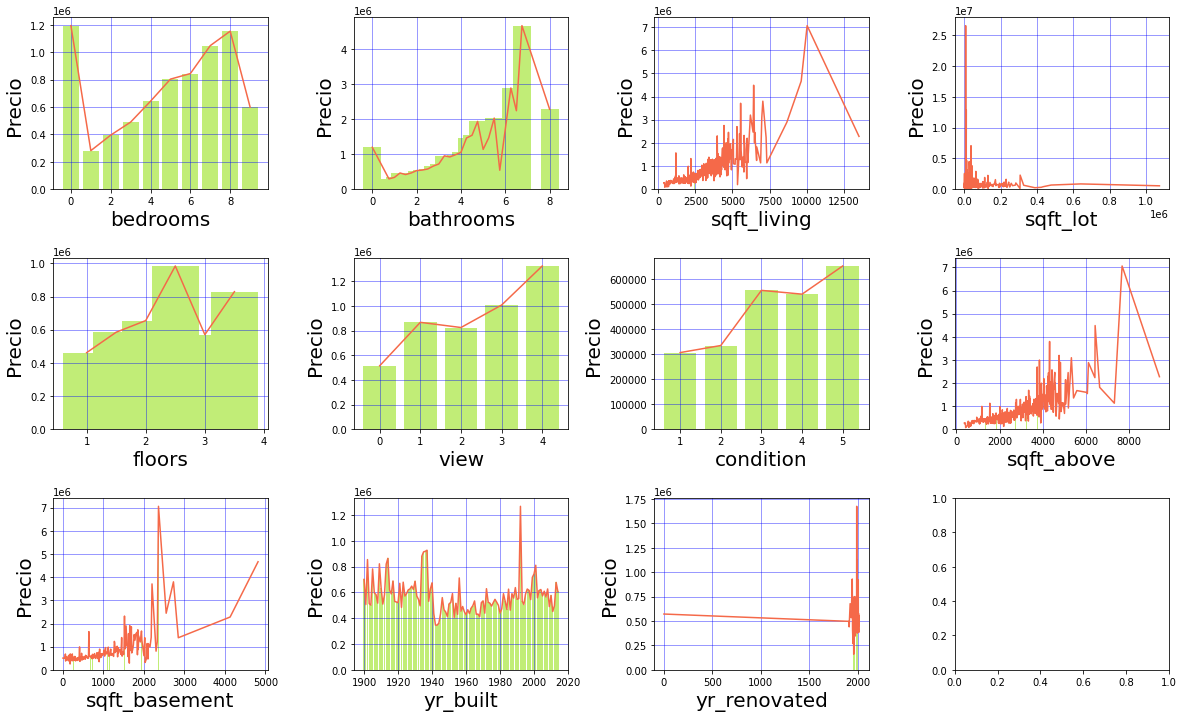

In [ ]:
# realizamos los cuadros para poder revisar la relacion que lleva el precio con cada variable del DF
# En esta ocacion podemos observar que la relacion de precio con el resto de variables es mas fuerte
fig, axs = plt.subplots(3, 4, figsize=(20, 12))

i = 0
j = 0
for columna in house.columns:
    if columna not in ['price', 'date', 'city', 'street', 'country','waterfront', 'statezip']:
      
        groupby = house.groupby([columna])['price'].mean().round(0)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        
        axs[i, j].bar(groupby.index, groupby.values, color = '#C1ED77')
        axs[i, j].plot(groupby.index, groupby.values, color = '#F56949')
    
        # axs[i, j].set_title(f'Precio segun {columna}')
        axs[i, j].set_xlabel(columna, fontsize=20)
        axs[i, j].set_ylabel('Precio ', fontsize=20)
        axs[i, j].grid(color = 'blue', alpha = 0.5)

        j += 1
        if j == 4:
            i += 1
            j = 0


In [ ]:
# Vemos que la variable de "yr_renovated" posee datos erroneos por lo que realizamos una limpieza de los outliers
house = house[house['yr_renovated'] >= 1900]

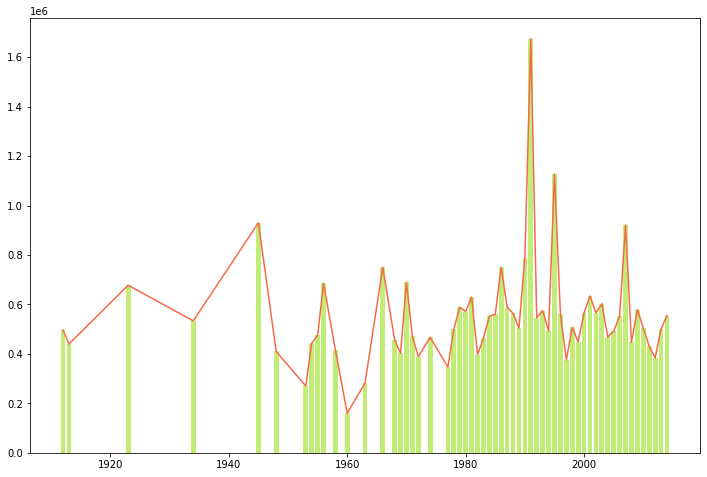

In [ ]:
# realizamos de nuevo el grafico y vemos que precio y yr_renovated poseen una relacion muy fuerte
groupby = house.groupby(['yr_renovated'])['price'].mean().round(0)
fig, ax = plt.subplots( figsize=(12,8))
ax.bar(groupby.index, groupby.values, color = '#C1ED77')
ax.plot(groupby.index, groupby.values, color = '#F56949')

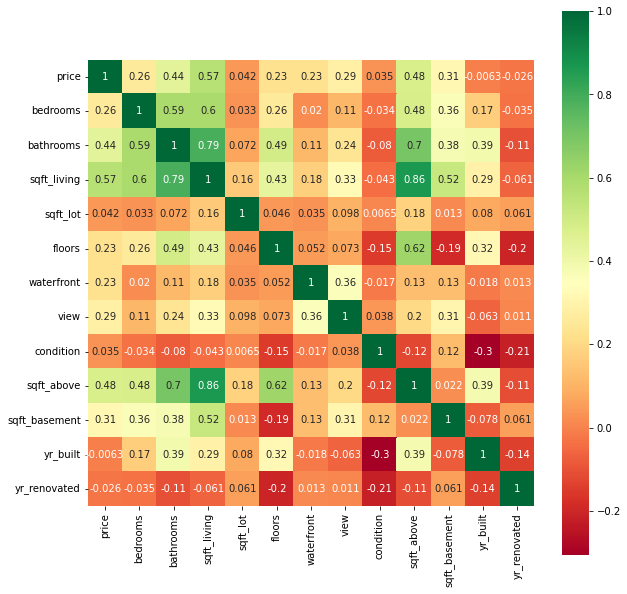

In [ ]:
# realizamos un heatmap para observarlo de otra manera
# Observamos que esta vez precio posee mayor cantidad de relacion con el resto de variables
plt.figure(figsize=(10,10)) 
p=sns.heatmap(house.corr(), annot=True,cmap='RdYlGn',square=True)

### Realizamos el analisis del resto de variables

In [ ]:
graf6 = house.groupby('city')[['price']].mean().sort_values(by='price', ascending=True).round(1)
# graf4['price'] = graf4['price'].round(1)
graf6

,price
city,
Skykomish,134000.0
Algona,165000.0
Pacific,174000.0
SeaTac,213498.3
Des Moines,283723.8
Federal Way,288808.5
Auburn,289416.7
Kent,295961.7
Enumclaw,318410.0


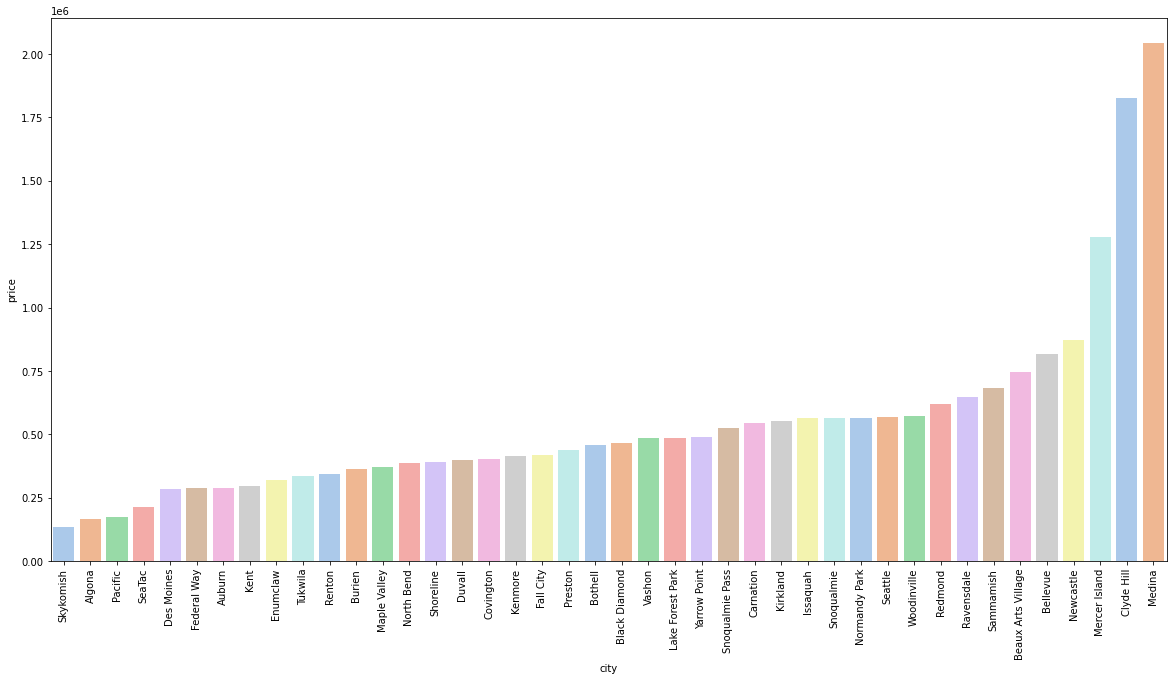

In [ ]:
# aca vemos si una relacion más fuerte que en el caso donde se sacaron los outliers
plt.figure(figsize=(20,10)) 
sns.barplot(x=graf6.index, y="price", data=graf6, palette="pastel")
plt.xticks(rotation=90)
plt.show()

In [ ]:
graf7 = house.groupby('statezip')[['price']].mean().sort_values(by='price', ascending=True).round(1)
graf7

,price
statezip,
WA 98288,134000.0
WA 98047,174000.0
WA 98057,187527.0
WA 98188,223711.6
WA 98002,231825.4
WA 98001,255113.8
WA 98168,263171.2
WA 98032,263420.0
WA 98148,274777.8


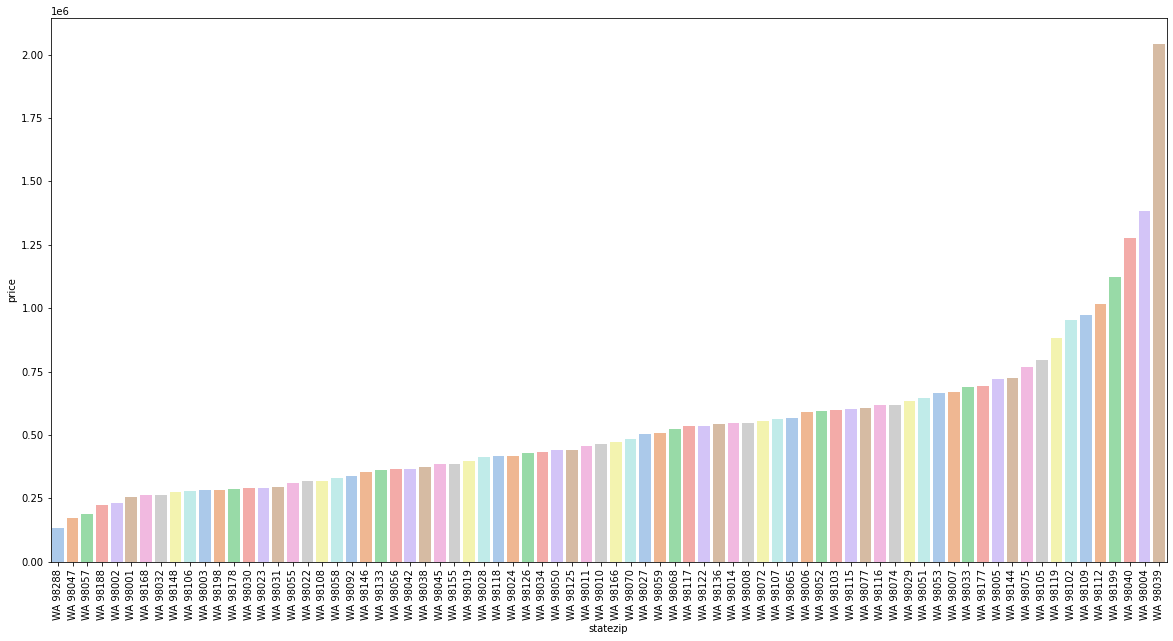

In [ ]:
# mismo patron, encontramos que si hay una relacion mayor
plt.figure(figsize=(20,10)) 
sns.barplot(x=graf7.index, y="price", data=graf7, palette="pastel")
plt.xticks(rotation=90)
plt.show()

### Librería Statsmodels 'Modelo Lineal Simple' sin outliers

En este caso hay algun problema que no logro deducir. Segun entiendo, debería tener un porcentaje para predecir mucho mayor en los dos casos ( 'price~ city  + statezip'    (((Y)))   'price~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + sqft_above + sqft_basement + yr_built + yr_renovated') 

In [ ]:

model1 = 'price~city  + statezip'
lm1   = sm.ols(formula = model1, data = house).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     8.450
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           7.08e-86
Time:                        15:22:00   Log-Likelihood:                -26417.
No. Observations:                1845   AIC:                         5.302e+04
Df Residuals:                    1753   BIC:                         5.353e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
# Ahora realizamos con el mismo modelo y vemos que solamente logramos predecir solo el 28% 
model1 = 'price~bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + sqft_above + sqft_basement + yr_built + yr_renovated'
lm1   = sm.ols(formula = model1, data = house).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     103.7
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.51e-183
Time:                        15:22:00   Log-Likelihood:                -26306.
No. Observations:                1845   AIC:                         5.264e+04
Df Residuals:                    1833   BIC:                         5.270e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.882e+06   1.27e+06      5.432

### Segundas impresiones

- A primera vista viendo los graficos observamos que lo que guía el precio son los atributos de los inmuebles y no es tan importante el tema de la ubicacion y el codigo postal por lo que tiene mas fuerza la HIPOTESIS NULA.

- Ahora bien con respecto al modelo lineal simple evidentemente hay algun problema que no estoy pudiendo encontrar. Probablemente este mal utilizado o no sea el correcto.

- Por otro lado tampoco, con los analisis hechos, no se puede decidir si es mejor quitar los outliers o mantenerlos

## Otro (no dar importancia)

In [ ]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 KB 17.5 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=f7493ca7844f140ffa78624239f77f88b33511e91616a2f01416148c4a09b0b4
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import funpymodeling.exploratory as fe

In [ ]:
from funpymodeling.exploratory import status
from funpymodeling.exploratory import profiling_num
from funpymodeling.exploratory import freq_tbl

In [ ]:
fe.freq_tbl(house)

                   date  frequency  percentage  cumulative_perc
0   2014-06-23 00:00:00         88    0.033549         0.033549
1   2014-06-25 00:00:00         79    0.030118         0.063668
2   2014-05-20 00:00:00         77    0.029356         0.093023
3   2014-07-08 00:00:00         73    0.027831         0.120854
4   2014-07-09 00:00:00         70    0.026687         0.147541
..                  ...        ...         ...              ...
65  2014-07-04 00:00:00          2    0.000762         0.997713
66  2014-07-05 00:00:00          2    0.000762         0.998475
67  2014-07-06 00:00:00          2    0.000762         0.999238
68  2014-05-17 00:00:00          1    0.000381         0.999619
69  2014-05-11 00:00:00          1    0.000381         1.000000

[70 rows x 4 columns]

----------------------------------------------------------------

                      street  frequency  percentage  cumulative_perc
0      2520 Mulberry Walk NE          4    0.001525         0.001525
1   

In [ ]:
profiling_num(house)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,price,388516.137629,125428.177910,0.322839,148000.00,199050.0,287000.0,385000.0,490000.0,595799.2,625000.00
1,bedrooms,3.205109,0.865398,0.270006,1.22,2.0,3.0,3.0,4.0,5.0,5.00
2,bathrooms,1.939287,0.676656,0.348920,1.00,1.0,1.5,2.0,2.5,3.0,3.50
3,sqft_living,1724.144491,600.342549,0.348197,700.00,880.0,1265.0,1660.0,2090.0,2799.8,3400.00
4,sqft_lot,6204.435761,2608.555316,0.420434,937.10,1320.3,4368.0,6500.0,8153.0,10005.0,10725.34
...,...,...,...,...,...,...,...,...,...,...,...
8,condition,3.415555,0.645658,0.189035,3.00,3.0,3.0,3.0,4.0,5.0,5.00
9,sqft_above,1488.534502,568.558679,0.381959,690.00,810.0,1080.0,1340.0,1790.0,2630.0,3157.80
10,sqft_basement,235.609989,364.537313,1.547207,0.00,0.0,0.0,0.0,470.0,989.0,1295.60
11,yr_built,1970.281738,30.365199,0.015412,1903.00,1912.0,1949.0,1972.0,1999.0,2010.0,2014.00
